In [23]:
import os
import re
import statistics
from src.najdi_rok import najdi_rok
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

In [3]:
df = pd.read_parquet(os.path.join("data","cnb_vyber.parquet"))
df = df.explode('008')
df['rok'] = df['008'].apply(lambda x: najdi_rok(x))

In [4]:
df = df.dropna(subset=['245_a','rok'])

In [9]:
island = df[["245_a","072_x","651_a","653_a","655_a"]].apply(lambda row: row.astype(str).str.contains('island', case=False, na=False).any(), axis=1)

In [15]:
island = df[

    df['245_a'].astype(str).str.lower().str.contains('island') |
    df['072_x'].astype(str).str.lower().str.contains('island') |
    df['651_a'].astype(str).str.lower().str.contains('island') |
    df['653_a'].astype(str).str.lower().str.contains('island') |
    df['655_a'].astype(str).str.lower().str.contains('island')

]

In [16]:
len(island)

554

In [25]:
island[['100_a','245_a','rok']]

,100_a,245_a,rok
001,,,
bk192603725,"Loti, Pierre,",Rybář islandský :,1926.0
bk192700704,None,"Saga o Egilovi, synu Skallagrímově /",1926.0
bk192901799,"Hugo, Victor,",Han z Islandu =,1928.0
bk192902835,"Marczyński, Antoni,",Otrokyně z Long Islandu :,1929.0
bk192904774,"Jón Sveinsson,",Islandské povídky /,1929.0
bk193101196,"Horák, Bohuslav,","Daniel Vetter a jeho ""Islandia"" /",1931.0
bk193101302,"Hugo, Victor,",Han z Islandu /,1931.0
bk193404005,"Jón Sveinsson,",Nonni a Manni :,1934.0
bk193502152,"Kuthan, Miroslav,",Vulkanologické studie z poloostrova Reykjanesu...,1935.0


In [29]:
island.sort_values(by='rok').to_csv(os.path.join("data_raw","island.csv"))

<Axes: xlabel='rok'>

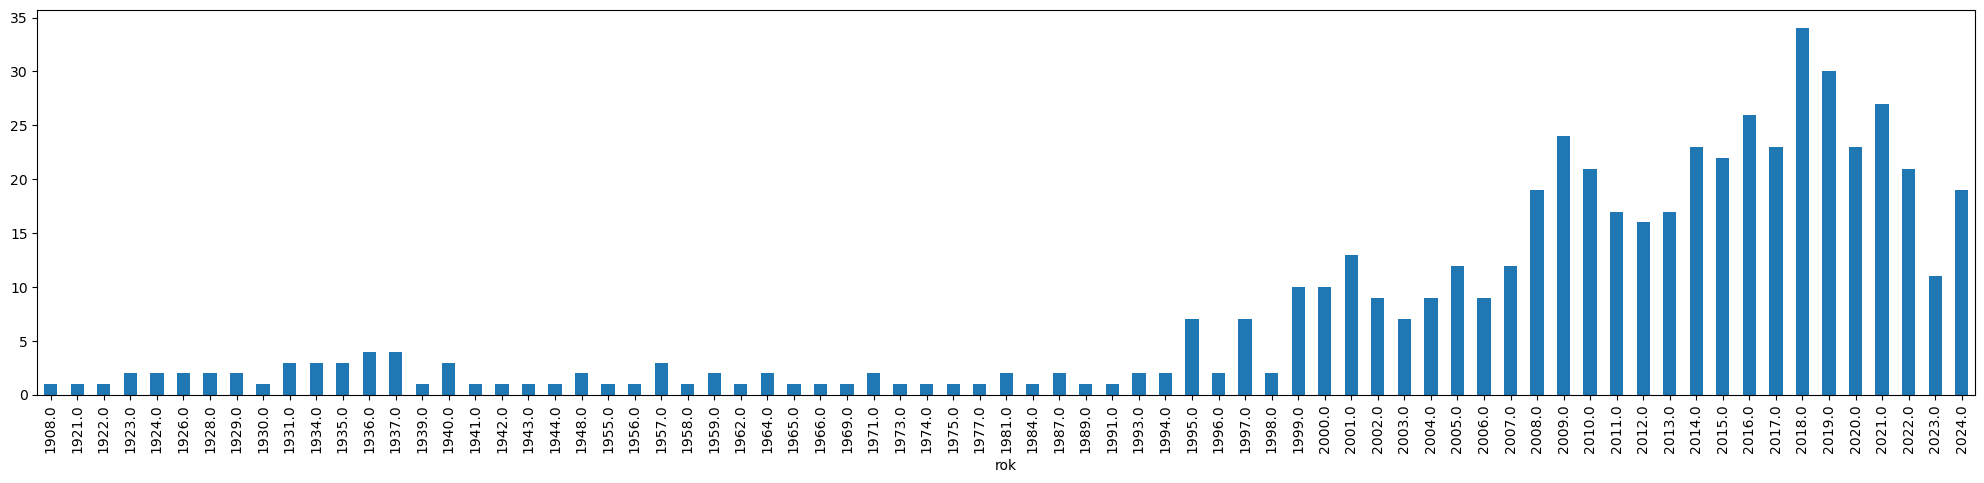

In [17]:
island.groupby("rok").size().plot.bar(figsize=(25,5))